<a href="https://colab.research.google.com/github/JeonginWon/Finance-Data-Kospi/blob/main/Finance_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. 데이터 전처리

In [ ]:
#google drive 연결
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 필요한 라이브러리 추가

In [ ]:
#필요한 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics 

### 데이터 불러오기

data = kospi <br>
data1 = 해외지수 및 뮬가지수<br>
data2 = 해외통화<br>
data3 = oil(원유) <br>
data4 = 반도체 수출데이터

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/2023금융분석/data/kospi_data.csv')
data

,Date,Close,Open,High,Low,Volume,Change
0,1981-05-01,123.60,123.60,123.60,123.60,3330000.0,0.0098
1,1981-05-02,123.50,123.50,123.50,123.50,2040000.0,-0.0008
2,1981-05-04,120.60,120.60,120.60,120.60,1930000.0,-0.0235
3,1981-05-06,120.70,120.70,120.70,120.70,1690000.0,0.0008
4,1981-05-07,119.30,119.30,119.30,119.30,1480000.0,-0.0116
...,...,...,...,...,...,...,...
11019,2022-08-25,2477.26,2459.79,2477.26,2455.32,426230000.0,0.0122
11020,2022-08-26,2481.03,2489.14,2497.76,2476.75,520090000.0,0.0015
11021,2022-08-29,2426.89,2432.06,2432.89,2417.01,448750000.0,-0.0218
11022,2022-08-30,2450.93,2441.21,2453.91,2433.48,327210.0,0.0099


In [ ]:
data1 = pd.read_csv('/content/drive/MyDrive/2023금융분석/data/해외지수.csv')
data2 = pd.read_excel('/content/drive/MyDrive/2023금융분석/data/해외통화.xlsx')

In [ ]:
data3 = pd.read_excel('/content/drive/MyDrive/2023금융분석/data/oilprice.xlsx')
data3

,시점,oilprice
0,2000.01,1220.34
1,2000.02,1214.00
2,2000.03,1212.51
3,2000.04,1190.17
4,2000.05,1187.77
...,...,...
271,2022.08,1792.19
272,2022.09,1730.00
273,2022.10,1666.65
274,2022.11,1650.32


In [ ]:
data.info()
data1.info()
data2.info()
data3.info()

### 데이터 형식 맞추기
DATE == > 기존의 형식(object, str) 날짜 형식으로 datetime으로 변경

In [ ]:
data["Date"] = pd.to_datetime(data["Date"])    # Datetime으로 바꿔준 컬럼을 기존 컬럼으로 변경

In [ ]:
data1['날짜']=data1['날짜'].apply(lambda x: pd.to_datetime(str(x),format='%Y-%m'))

In [ ]:
data2['date']=data2['date'].apply(lambda x: pd.to_datetime(str(x),format='%Y/%m/%d'))

In [ ]:
data3['시점']=data3['시점'].apply(lambda x: pd.to_datetime(str(x),format='%Y.%m'))

In [ ]:
data = data[data['Date'].between('2000-01-01', '2022-08-01')]
data

,Date,Close,Open,High,Low,Volume,Change
5427,2000-01-04,1059.04,1028.33,1066.18,1016.59,195900000.0,0.0301
5428,2000-01-05,986.31,1006.87,1026.52,984.05,257700000.0,-0.0687
5429,2000-01-06,960.79,1013.95,1014.90,953.50,203520000.0,-0.0259
5430,2000-01-07,948.65,949.17,970.16,930.84,215660000.0,-0.0126
5431,2000-01-10,987.24,979.67,994.94,965.02,240180000.0,0.0407
...,...,...,...,...,...,...,...
10998,2022-07-26,2412.96,2397.27,2415.39,2395.17,415670000.0,0.0039
10999,2022-07-27,2415.53,2412.52,2415.53,2396.19,333590000.0,0.0011
11000,2022-07-28,2435.27,2437.57,2443.43,2429.07,491070000.0,0.0082
11001,2022-07-29,2451.50,2453.53,2463.05,2442.01,499370000.0,0.0067


In [ ]:
data.head()

,Date,Close,Open,High,Low,Volume,Change
5427,2000-01-04,1059.04,1028.33,1066.18,1016.59,195900000.0,0.0301
5428,2000-01-05,986.31,1006.87,1026.52,984.05,257700000.0,-0.0687
5429,2000-01-06,960.79,1013.95,1014.90,953.50,203520000.0,-0.0259
5430,2000-01-07,948.65,949.17,970.16,930.84,215660000.0,-0.0126
5431,2000-01-10,987.24,979.67,994.94,965.02,240180000.0,0.0407


In [ ]:
data1

,날짜,한국(KOSPI),미국(Dow Jones),미국(NASDAQ),Euro STOXX,독일(DAX),일본(NIKKEI),싱가포르(STI),홍콩(항셍),중국(SHCOMP),생산자물가지수,소비자물가지수,수출물가지수,수입물가지수,주택매매가격지수
0,2000-01-01,943.88,10940.53,3940.35,4684.48,6835.60,19539.70,2231.82,15532.34,1535.00,78.77,62.456,133.88,75.60,38.995
1,2000-02-01,828.38,10128.31,4696.69,5182.62,7644.55,19959.52,2163.75,17169.44,1714.58,78.57,62.647,130.56,75.92,39.161
2,2000-03-01,860.94,10921.92,4572.83,5249.55,7599.39,20337.32,2150.24,17406.54,1800.23,78.52,62.962,128.19,75.88,39.327
3,2000-04-01,725.39,10733.91,3860.66,5303.95,7414.68,17973.70,2176.63,15519.30,1836.32,78.14,62.709,126.84,73.88,39.368
4,2000-05-01,731.88,10522.33,3400.91,5200.89,7109.67,16332.45,1865.31,14713.86,1894.55,77.95,62.393,127.89,75.46,39.327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,2022-08-01,2472.05,31510.43,11816.20,3517.25,12834.96,28091.53,3221.67,19954.39,3202.14,119.98,108.620,127.64,149.46,100.728
272,2022-09-01,2155.49,28725.51,10575.62,3318.20,12114.36,25937.21,3130.24,17222.83,3024.39,120.06,108.930,131.24,154.51,100.568
273,2022-10-01,2293.61,32732.95,10988.15,3617.54,13253.74,27587.46,3093.11,14687.02,2893.48,120.68,109.210,132.74,156.30,100.014
274,2022-11-01,2472.53,34589.77,11468.00,3964.72,14397.04,27968.99,3290.49,18597.23,3151.34,120.29,109.100,125.51,147.72,98.909


In [ ]:
data2

,date,원/미국달러(매매기준율),원/유로,원/독일마르크,원/일본엔(100엔),원/싱가포르달러,원/중국위안
0,2000-01-04,1134.5,1161.67,593.95,1115.21,685.00,137.02
1,2000-01-05,1125.8,1159.01,592.59,1090.68,679.83,135.97
2,2000-01-06,1130.1,1166.04,596.19,1086.43,682.00,136.49
3,2000-01-07,1139.1,1175.32,600.93,1082.28,683.94,137.58
4,2000-01-08,1145.9,1179.07,602.85,1087.91,689.89,138.40
...,...,...,...,...,...,...,...
5744,2022-12-26,1282.2,1361.82,NaN,965.40,949.46,NaN
5745,2022-12-27,1276.4,1357.71,NaN,961.04,946.71,NaN
5746,2022-12-28,1268.3,1348.96,NaN,950.18,940.91,NaN
5747,2022-12-29,1268.4,1347.10,NaN,945.19,939.52,NaN


In [ ]:
data3.head()

,시점,oilprice
0,2000-01-01,1220.34
1,2000-02-01,1214.00
2,2000-03-01,1212.51
3,2000-04-01,1190.17
4,2000-05-01,1187.77


### df로 최종데이터 합치기

In [ ]:
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day
data1['year'] = data1['날짜'].dt.year
data1['month'] = data1['날짜'].dt.month
data2['year'] = data2['date'].dt.year
data2['month'] = data2['date'].dt.month
data2['day'] = data2['date'].dt.day
data3['year'] = data3['시점'].dt.year
data3['month'] = data3['시점'].dt.month

<ipython-input-16-c40b87e447a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'] = data['Date'].dt.year
<ipython-input-16-c40b87e447a8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month'] = data['Date'].dt.month
<ipython-input-16-c40b87e447a8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

In [ ]:
df1 = pd.merge(data, data2, on=["year", "month", "day"])
df1

,Date,Close,Open,High,Low,Volume,Change,year,month,day,date,원/미국달러(매매기준율),원/유로,원/독일마르크,원/일본엔(100엔),원/싱가포르달러,원/중국위안
0,2000-01-04,1059.04,1028.33,1066.18,1016.59,195900000.0,0.0301,2000,1,4,2000-01-04,1134.5,1161.67,593.95,1115.21,685.00,137.02
1,2000-01-05,986.31,1006.87,1026.52,984.05,257700000.0,-0.0687,2000,1,5,2000-01-05,1125.8,1159.01,592.59,1090.68,679.83,135.97
2,2000-01-06,960.79,1013.95,1014.90,953.50,203520000.0,-0.0259,2000,1,6,2000-01-06,1130.1,1166.04,596.19,1086.43,682.00,136.49
3,2000-01-07,948.65,949.17,970.16,930.84,215660000.0,-0.0126,2000,1,7,2000-01-07,1139.1,1175.32,600.93,1082.28,683.94,137.58
4,2000-01-10,987.24,979.67,994.94,965.02,240180000.0,0.0407,2000,1,10,2000-01-10,1145.9,1180.33,603.49,1089.93,689.89,138.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5571,2022-07-26,2412.96,2397.27,2415.39,2395.17,415670000.0,0.0039,2022,7,26,2022-07-26,1311.0,1339.78,NaN,960.47,945.51,NaN
5572,2022-07-27,2415.53,2412.52,2415.53,2396.19,333590000.0,0.0011,2022,7,27,2022-07-27,1310.0,1327.16,NaN,957.15,942.89,NaN
5573,2022-07-28,2435.27,2437.57,2443.43,2429.07,491070000.0,0.0082,2022,7,28,2022-07-28,1312.8,1339.65,NaN,962.57,949.69,NaN
5574,2022-07-29,2451.50,2453.53,2463.05,2442.01,499370000.0,0.0067,2022,7,29,2022-07-29,1304.0,1329.30,NaN,970.53,945.30,NaN


In [ ]:
df2 = pd.merge(df1, data1, on=["year", "month"])
df2

,Date,Close,Open,High,Low,Volume,Change,year,month,day,...,독일(DAX),일본(NIKKEI),싱가포르(STI),홍콩(항셍),중국(SHCOMP),생산자물가지수,소비자물가지수,수출물가지수,수입물가지수,주택매매가격지수
0,2000-01-04,1059.04,1028.33,1066.18,1016.59,195900000.0,0.0301,2000,1,4,...,6835.60,19539.70,2231.82,15532.34,1535.00,78.77,62.456,133.88,75.60,38.995
1,2000-01-05,986.31,1006.87,1026.52,984.05,257700000.0,-0.0687,2000,1,5,...,6835.60,19539.70,2231.82,15532.34,1535.00,78.77,62.456,133.88,75.60,38.995
2,2000-01-06,960.79,1013.95,1014.90,953.50,203520000.0,-0.0259,2000,1,6,...,6835.60,19539.70,2231.82,15532.34,1535.00,78.77,62.456,133.88,75.60,38.995
3,2000-01-07,948.65,949.17,970.16,930.84,215660000.0,-0.0126,2000,1,7,...,6835.60,19539.70,2231.82,15532.34,1535.00,78.77,62.456,133.88,75.60,38.995
4,2000-01-10,987.24,979.67,994.94,965.02,240180000.0,0.0407,2000,1,10,...,6835.60,19539.70,2231.82,15532.34,1535.00,78.77,62.456,133.88,75.60,38.995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5571,2022-07-26,2412.96,2397.27,2415.39,2395.17,415670000.0,0.0039,2022,7,26,...,13484.05,27801.64,3211.56,20156.51,3253.24,120.44,108.740,129.35,150.78,100.869
5572,2022-07-27,2415.53,2412.52,2415.53,2396.19,333590000.0,0.0011,2022,7,27,...,13484.05,27801.64,3211.56,20156.51,3253.24,120.44,108.740,129.35,150.78,100.869
5573,2022-07-28,2435.27,2437.57,2443.43,2429.07,491070000.0,0.0082,2022,7,28,...,13484.05,27801.64,3211.56,20156.51,3253.24,120.44,108.740,129.35,150.78,100.869
5574,2022-07-29,2451.50,2453.53,2463.05,2442.01,499370000.0,0.0067,2022,7,29,...,13484.05,27801.64,3211.56,20156.51,3253.24,120.44,108.740,129.35,150.78,100.869


In [ ]:
df3 = pd.merge(df2, data3, on=["year", "month"])
df3

,Date,Close,Open,High,Low,Volume,Change,year,month,day,...,싱가포르(STI),홍콩(항셍),중국(SHCOMP),생산자물가지수,소비자물가지수,수출물가지수,수입물가지수,주택매매가격지수,시점,oilprice
0,2000-01-04,1059.04,1028.33,1066.18,1016.59,195900000.0,0.0301,2000,1,4,...,2231.82,15532.34,1535.00,78.77,62.456,133.88,75.60,38.995,2000-01-01,1220.34
1,2000-01-04,1059.04,1028.33,1066.18,1016.59,195900000.0,0.0301,2000,1,4,...,2231.82,15532.34,1535.00,78.77,62.456,133.88,75.60,38.995,2000-01-01,1306.15
2,2000-01-05,986.31,1006.87,1026.52,984.05,257700000.0,-0.0687,2000,1,5,...,2231.82,15532.34,1535.00,78.77,62.456,133.88,75.60,38.995,2000-01-01,1220.34
3,2000-01-05,986.31,1006.87,1026.52,984.05,257700000.0,-0.0687,2000,1,5,...,2231.82,15532.34,1535.00,78.77,62.456,133.88,75.60,38.995,2000-01-01,1306.15
4,2000-01-06,960.79,1013.95,1014.90,953.50,203520000.0,-0.0259,2000,1,6,...,2231.82,15532.34,1535.00,78.77,62.456,133.88,75.60,38.995,2000-01-01,1220.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5593,2022-07-26,2412.96,2397.27,2415.39,2395.17,415670000.0,0.0039,2022,7,26,...,3211.56,20156.51,3253.24,120.44,108.740,129.35,150.78,100.869,2022-07-01,2029.99
5594,2022-07-27,2415.53,2412.52,2415.53,2396.19,333590000.0,0.0011,2022,7,27,...,3211.56,20156.51,3253.24,120.44,108.740,129.35,150.78,100.869,2022-07-01,2029.99
5595,2022-07-28,2435.27,2437.57,2443.43,2429.07,491070000.0,0.0082,2022,7,28,...,3211.56,20156.51,3253.24,120.44,108.740,129.35,150.78,100.869,2022-07-01,2029.99
5596,2022-07-29,2451.50,2453.53,2463.05,2442.01,499370000.0,0.0067,2022,7,29,...,3211.56,20156.51,3253.24,120.44,108.740,129.35,150.78,100.869,2022-07-01,2029.99


In [ ]:
df = df3.groupby(['year', 'month']).mean()
df

Close         Open         High          Low        Volume  \
year month                                                                     
2000 1       952.520000   954.060500   970.064500   936.437500  2.399200e+08   
     2       902.731000   909.486500   922.325000   889.640500  2.572330e+08   
     3       878.380909   881.225455   892.235000   865.446364  2.971127e+08   
     4       779.746111   786.478889   798.397778   768.914444  2.285289e+08   
     5       720.768500   718.501000   732.911000   707.109500  2.470175e+08   
...                 ...          ...          ...          ...           ...   
2022 4      2703.242857  2700.210000  2711.937143  2688.504762  9.540277e+08   
     5      2628.338571  2628.356190  2642.547619  2613.174286  8.030019e+08   
     6      2474.948500  2487.598500  2500.373500  2459.425500  6.007340e+08   
     7      2362.794762  2363.606190  2376.837143  2347.320952  3.788405e+08   
     8      2452.250000  2444.050000  2461.400000  2437.130000  4.871600e+08   

              Change        day  원/미국달러(매매기준율)         원/유로     원/독일마르크  ...  \
year month                                                               ...   
2000 1     -0.003865  16.900000    1131.145000  1148.688500  587.315000  ...   
     2     -0.006220  15.150000    1128.715000  1110.976500  568.033500  ...   
     3      0.002064  17.045455    1117.272727  1077.574091  550.956364  ...   
     4     -0.008667  16.222222    1109.955556  1050.026667  536.872222  ...   
     5      0.000940  17.150000    1119.955000  1016.814500  519.889000  ...   
...              ...        ...            ...          ...         ...  ...   
2022 4     -0.001062  15.761905    1232.338095  1334.080000         NaN  ...   
     5     -0.000105  16.476190    1269.880952  1342.431905         NaN  ...   
     6     -0.006930  16.900000    1277.345000  1348.963500         NaN  ...   
     7      0.002419  15.761905    1307.395238  1332.909048         NaN  ...   
     8      0.000300   1.000000    1298.600000  1326.780000         NaN  ...   

            일본(NIKKEI)  싱가포르(STI)    홍콩(항셍)  중국(SHCOMP)  생산자물가지수  소비자물가지수  \
year month                                                                  
2000 1        19539.70    2231.82  15532.34     1535.00    78.77   62.456   
     2        19959.52    2163.75  17169.44     1714.58    78.57   62.647   
     3        20337.32    2150.24  17406.54     1800.23    78.52   62.962   
     4        17973.70    2176.63  15519.30     1836.32    78.14   62.709   
     5        16332.45    1865.31  14713.86     1894.55    77.95   62.393   
...                ...        ...       ...         ...      ...      ...   
2022 4        26847.90    3356.90  21089.39     3047.06   118.59  106.850   
     5        27279.80    3232.49  21415.20     3186.43   119.43  107.560   
     6        26393.04    3102.21  21859.79     3398.62   120.10  108.220   
     7        27801.64    3211.56  20156.51     3253.24   120.44  108.740   
     8        28091.53    3221.67  19954.39     3202.14   119.98  108.620   

            수출물가지수  수입물가지수  주택매매가격지수  oilprice  
year month                                      
2000 1      133.88   75.60    38.995  1263.245  
     2      130.56   75.92    39.161  1214.000  
     3      128.19   75.88    39.327  1212.510  
     4      126.84   73.88    39.368  1190.170  
     5      127.89   75.46    39.327  1187.770  
...            ...     ...       ...       ...  
2022 4      127.45  148.38   100.517  1976.530  
     5      131.32  154.00   100.768  1967.070  
     6      132.61  154.87   100.869  2084.000  
     7      129.35  150.78   100.869  2029.990  
     8      127.64  149.46   100.728  1792.190  

[250 rows x 28 columns]

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 27 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-san

## 2. 데이터분석

### 상관관계 분석

In [ ]:
# 기본 임포트
import os
import shutil
from IPython.display import clear_output

# 경고 뜨지 않게..
import warnings
warnings.filterwarnings('ignore')

# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# 그래프 설

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
plt.rc('font', family='NanumBarunGothic') 

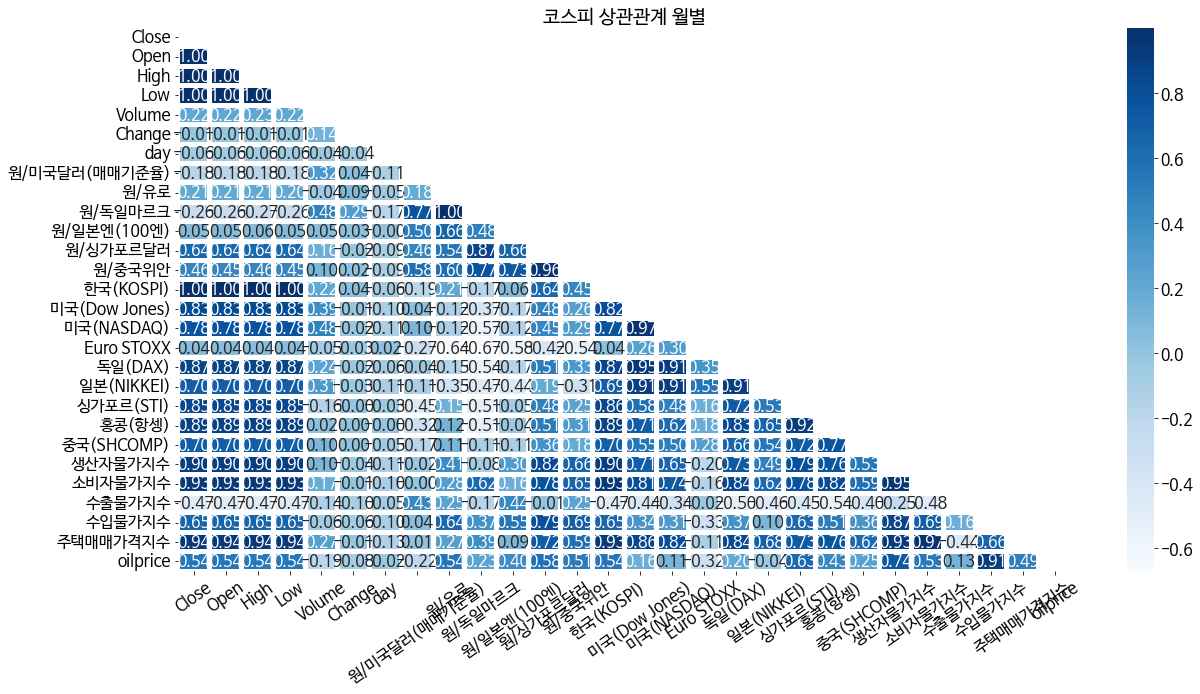

In [ ]:
data_heat = df.corr()
mask = np.zeros_like(data_heat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data_heat, mask = mask, annot=True, linewidths=4, fmt='.2f', cmap='Blues')
plt.xticks(rotation=35)
plt.title('코스피 상관관계 월별')
plt.show()

###표준화 및 코스피 기준 시각화

In [ ]:
# 표준화
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler1 = StandardScaler()
X = scaler1.fit_transform(df)
X

array([[-1.09410997, -1.09213706, -1.07970364, ..., -1.35155573,
        -1.843864  , -1.27458772],
       [-1.1686243 , -1.15880953, -1.15091634, ..., -1.33666421,
        -1.83270265, -1.48848144],
       [-1.2050667 , -1.20108157, -1.19580139, ..., -1.33852565,
        -1.8215413 , -1.4949532 ],
       ...,
       [ 1.18435994,  1.20168394,  1.20304807, ...,  2.33735166,
         2.31636014,  2.29032926],
       [ 1.01651041,  1.01621989,  1.01876971, ...,  2.14701949,
         2.31636014,  2.05573895],
       [ 1.15038932,  1.13654537,  1.14491156, ...,  2.08559199,
         2.30687972,  1.02286403]])

In [ ]:
df_a = pd.DataFrame(X)
df_a.index = df.index
df_a.columns = df.columns
df_a.reset_index(inplace=True)
df_a.head(15)

,year,month,Close,Open,High,Low,Volume,Change,day,원/미국달러(매매기준율),...,일본(NIKKEI),싱가포르(STI),홍콩(항셍),중국(SHCOMP),생산자물가지수,소비자물가지수,수출물가지수,수입물가지수,주택매매가격지수,oilprice
0,2000,1,-1.094110,-1.092137,-1.079704,-1.104711,-0.976482,-1.462114,0.927532,-0.017337,...,0.672106,-0.703361,-0.833614,-1.184972,-1.532993,-1.851982,2.050501,-1.351556,-1.843864,-1.274588
1,2000,2,-1.168624,-1.158810,-1.150916,-1.174975,-0.904201,-2.284777,-0.485122,-0.041556,...,0.745482,-0.809748,-0.546825,-0.975777,-1.551132,-1.836945,1.743605,-1.336664,-1.832703,-1.488481
2,2000,3,-1.205067,-1.201082,-1.195801,-1.211301,-0.737703,0.608914,1.044948,-0.155594,...,0.811513,-0.830863,-0.505290,-0.876003,-1.555667,-1.812146,1.524526,-1.338526,-1.821541,-1.494953
3,2000,4,-1.352684,-1.342801,-1.335778,-1.356239,-1.024040,-3.139462,0.380409,-0.228519,...,0.398403,-0.789618,-0.835898,-0.833961,-1.590132,-1.832064,1.399734,-1.431598,-1.818785,-1.591986
4,2000,5,-1.440950,-1.444480,-1.433464,-1.449036,-0.946850,0.216399,1.129340,-0.128861,...,0.111548,-1.276181,-0.976996,-0.766129,-1.607364,-1.856941,1.496794,-1.358071,-1.821541,-1.602410
5,2000,6,-1.329785,-1.330902,-1.322312,-1.337587,-0.231764,1.939076,0.623860,-0.142318,...,0.300064,-0.926809,-0.724399,-0.727034,-1.590132,-1.832064,1.661335,-1.301762,-1.829879,-1.347536
6,2000,7,-1.331160,-1.326693,-1.325901,-1.332667,-0.149787,-2.667289,0.362471,-0.179092,...,0.005814,-0.944861,-0.604365,-0.615867,-1.582876,-1.812146,1.801841,-1.340852,-1.829879,-1.356527
7,2000,8,-1.441579,-1.440189,-1.437736,-1.443730,-0.834457,-0.399368,0.237717,-0.182820,...,0.203973,-0.807919,-0.559426,-0.618593,-1.582876,-1.787348,1.914616,-1.338060,-1.824365,-1.220707
8,2000,9,-1.587398,-1.587532,-1.582807,-1.593154,-0.711164,-2.141941,0.514948,-0.162631,...,0.009270,-1.031680,-0.813180,-0.747944,-1.559295,-1.722714,1.859153,-1.251969,-1.818785,-1.084887
9,2000,11,-1.705373,-1.707635,-1.705188,-1.705914,-0.583455,-0.161191,-0.055822,0.183535,...,-0.182768,-1.048794,-1.104785,-0.561035,-1.570178,-1.757511,1.310993,-1.184026,-1.824365,-1.211108


In [ ]:
df_a['날짜'] = df_a['year']  + df_a['month']
df_a

,year,month,Close,Open,High,Low,Volume,Change,day,원/미국달러(매매기준율),...,싱가포르(STI),홍콩(항셍),중국(SHCOMP),생산자물가지수,소비자물가지수,수출물가지수,수입물가지수,주택매매가격지수,oilprice,날짜
0,2000,1,-1.094110,-1.092137,-1.079704,-1.104711,-0.976482,-1.462114,0.927532,-0.017337,...,-0.703361,-0.833614,-1.184972,-1.532993,-1.851982,2.050501,-1.351556,-1.843864,-1.274588,2001
1,2000,2,-1.168624,-1.158810,-1.150916,-1.174975,-0.904201,-2.284777,-0.485122,-0.041556,...,-0.809748,-0.546825,-0.975777,-1.551132,-1.836945,1.743605,-1.336664,-1.832703,-1.488481,2002
2,2000,3,-1.205067,-1.201082,-1.195801,-1.211301,-0.737703,0.608914,1.044948,-0.155594,...,-0.830863,-0.505290,-0.876003,-1.555667,-1.812146,1.524526,-1.338526,-1.821541,-1.494953,2003
3,2000,4,-1.352684,-1.342801,-1.335778,-1.356239,-1.024040,-3.139462,0.380409,-0.228519,...,-0.789618,-0.835898,-0.833961,-1.590132,-1.832064,1.399734,-1.431598,-1.818785,-1.591986,2004
4,2000,5,-1.440950,-1.444480,-1.433464,-1.449036,-0.946850,0.216399,1.129340,-0.128861,...,-1.276181,-0.976996,-0.766129,-1.607364,-1.856941,1.496794,-1.358071,-1.821541,-1.602410,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,2022,4,1.526026,1.519702,1.518636,1.525931,2.004908,-0.482919,0.008827,0.991192,...,1.055033,0.139875,0.576440,2.078569,1.642963,1.456121,2.035333,2.292693,1.823538,2026
246,2022,5,1.413924,1.412225,1.415128,1.412826,1.374377,-0.148564,0.585420,1.365359,...,0.860592,0.196950,0.738793,2.154754,1.698858,1.813858,2.296865,2.309569,1.782448,2027
247,2022,6,1.184360,1.201684,1.203048,1.181980,0.529911,-2.532799,0.927532,1.439749,...,0.656977,0.274834,0.985975,2.215521,1.750817,1.933104,2.337352,2.316360,2.290329,2028
248,2022,7,1.016510,1.016220,1.018770,1.013660,-0.396491,0.733069,0.008827,1.739241,...,0.827881,-0.023548,0.816621,2.246359,1.791754,1.631754,2.147019,2.316360,2.055739,2029


###

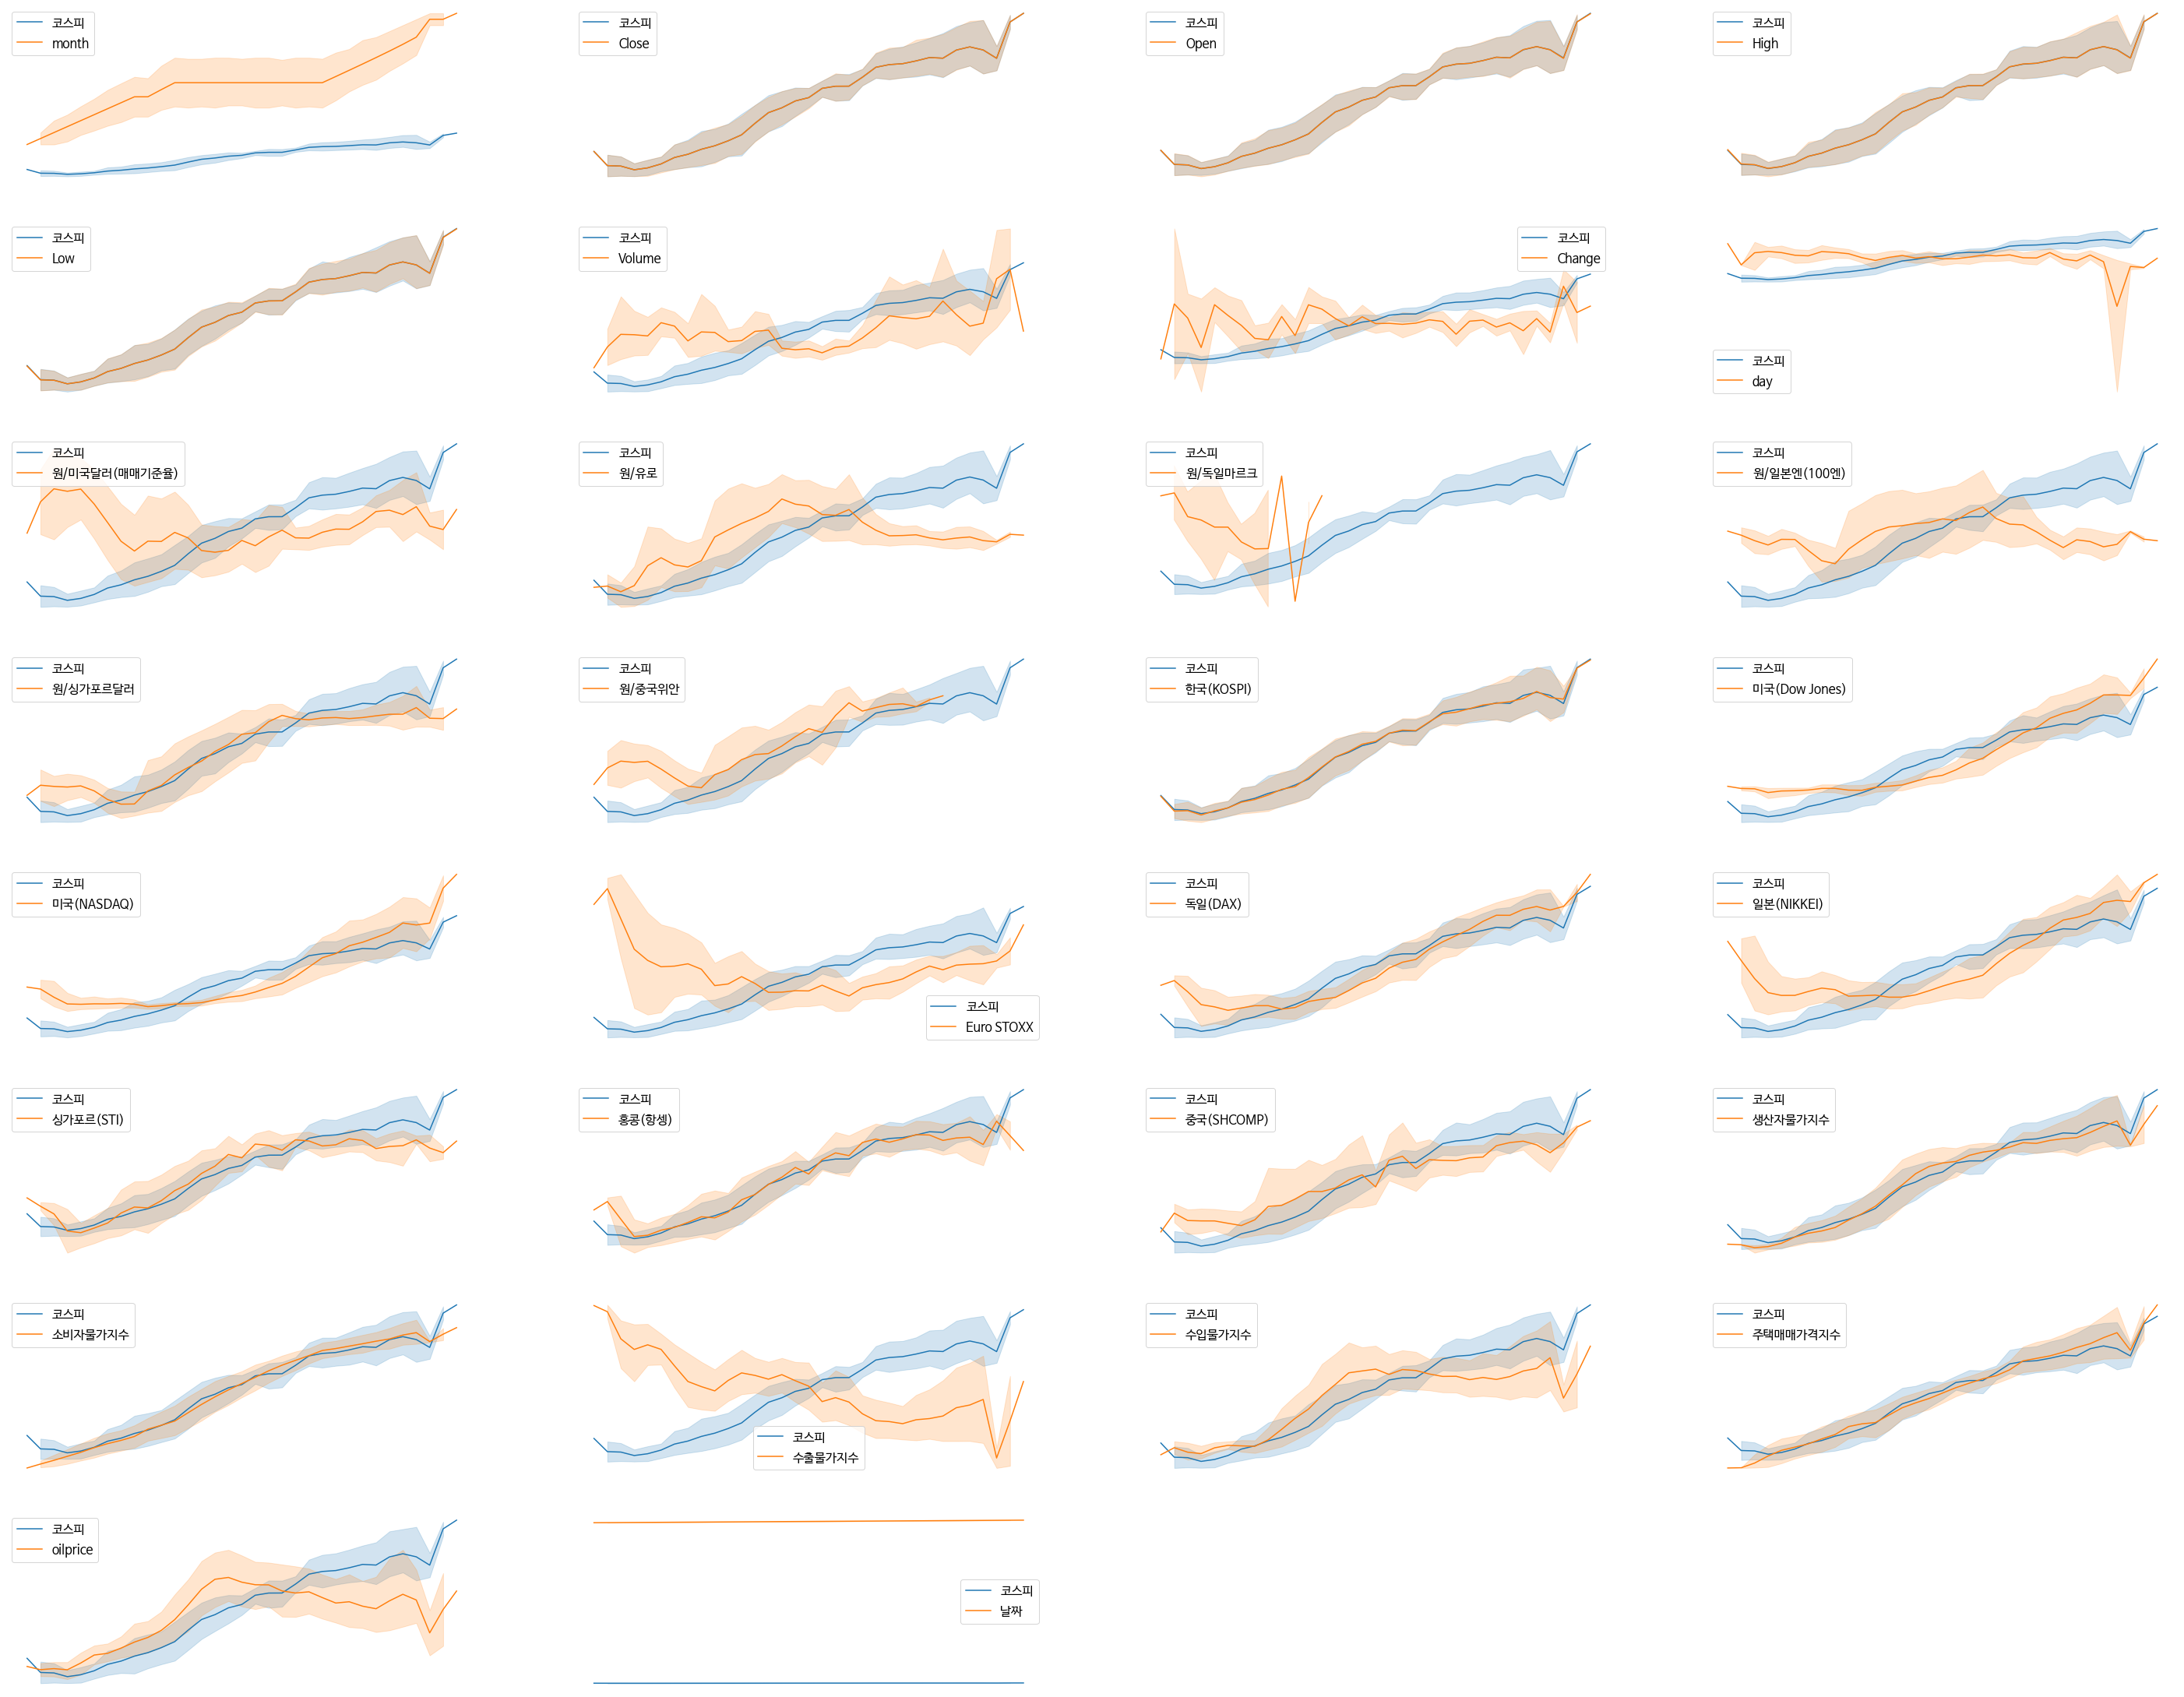

In [ ]:
a = df_a.columns[1:]
plt.figure(figsize=(50,50))
for idx, col in enumerate(a) :
    plt.subplot(10,4,1+int(idx))
    sns.lineplot(data=df_a, x='날짜', y='Close',label='코스피')
    sns.lineplot(data=df_a, x='날짜', y=col,label=col)
    plt.axis('off')
plt.show()

### 주기별 그래프

In [ ]:
df3_1 = df3[:1966] #2008 금융위기 전
df3_2 = df3[1967:2715] #2008 금융위기 이후 회복시간(~2010년)
df3_3 = df3[2716:4937] #2020 코로나 전
df3_4 = df3[4838:] #2020 코로나 이후 (2020년~)

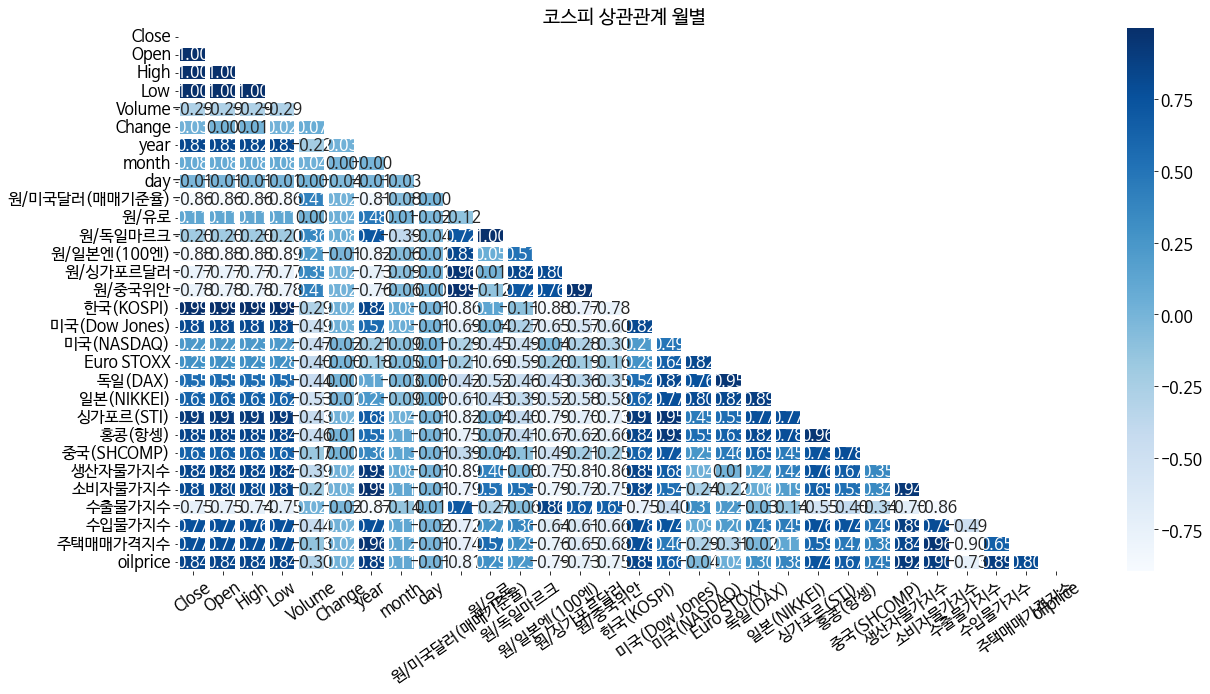

In [ ]:
df31_heat = df3_1.corr()
mask = np.zeros_like(df31_heat, dtype=np.bool)

mask[np.triu_indices_from(mask)] = True
sns.heatmap(df31_heat, mask = mask, annot=True, linewidths=4, fmt='.2f', cmap='Blues')
plt.xticks(rotation=35)
plt.title('코스피 상관관계 월별')
plt.show()

close와 기준

세계통화: 음의 상관관계 강함
미국달러. 일본엔. 싱가포르. 중국위안

세계주가: 양의관계
미국(dowjones) 일본(nikkei), 싱가포르(nikkei), 홍콩(항셍), 중국(shcomp)

물가지수(양의관계)
생산자물가지수. 소비자물가지수.수입물가지수. 주택매매가격지수. oilprice

수출물가지수(음의관계)



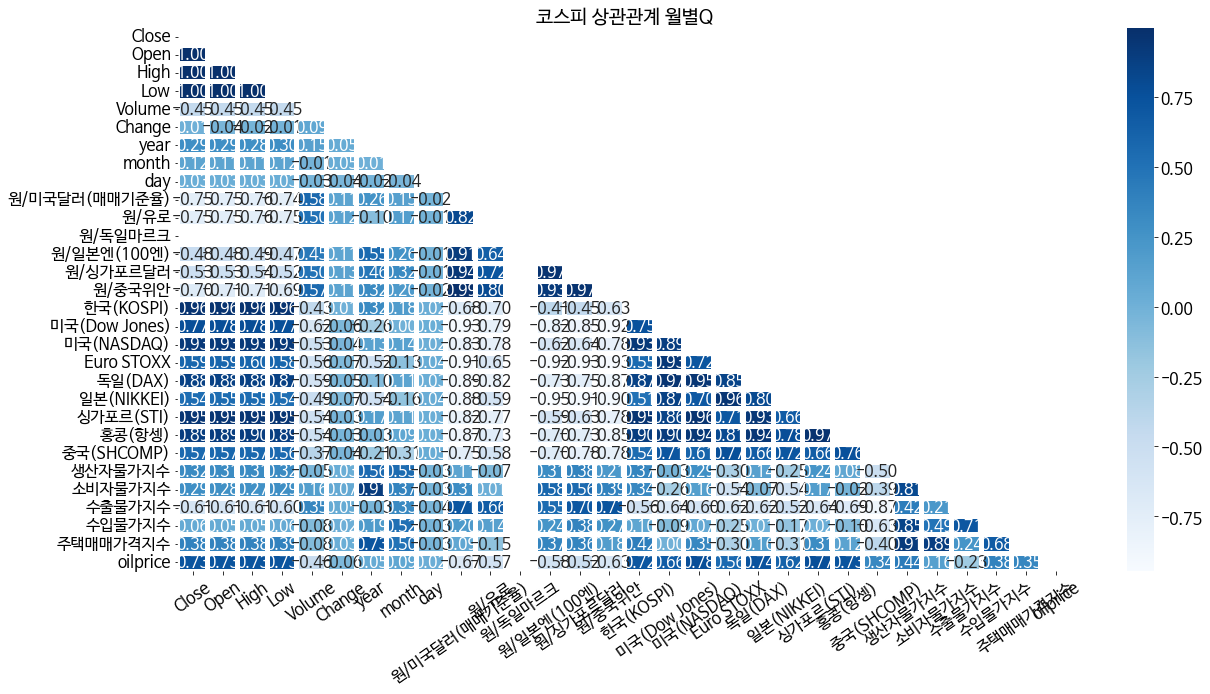

In [ ]:
df32_heat = df3_2.corr()
mask = np.zeros_like(df32_heat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df32_heat, mask = mask, annot=True, linewidths=4, fmt='.2f', cmap='Blues')
plt.xticks(rotation=35)
plt.title('코스피 상관관계 월별Q')
plt.show()

close와 기준

세계통화: 음의 상관관계 강함
미국달러 싱가포르. 중국위안

세계주가: 양의 상관관계 강함
미국(dowjones), 미국(NAXDAQ), EURO,  독일(DAX), 싱가포르(nikkei), 홍콩(항셍), 중국(shcomp)

oilprice 상관관계 강함

수출물가지수(음의관계)



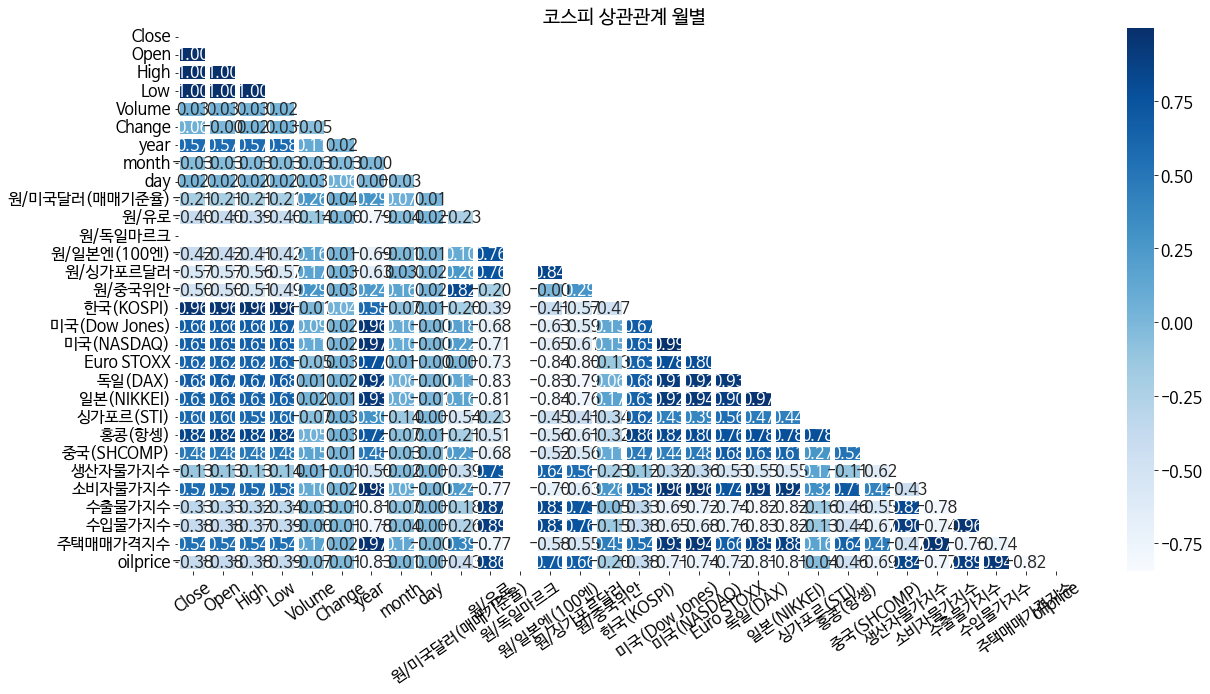

In [ ]:
df33_heat = df3_3.corr()
mask = np.zeros_like(df33_heat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df33_heat, mask = mask, annot=True, linewidths=4, fmt='.2f', cmap='Blues')
plt.xticks(rotation=35)
plt.title('코스피 상관관계 월별')
plt.show()

close와 기준

세계통화: 음의 상관관계 보임 (금융위기 이후 강한 상관관계가 낮아짐)
세계주가: 양의 상관관계 보임
소비자물가지지수, 주택매매가격지수 와 양의 상관관계 보임. 



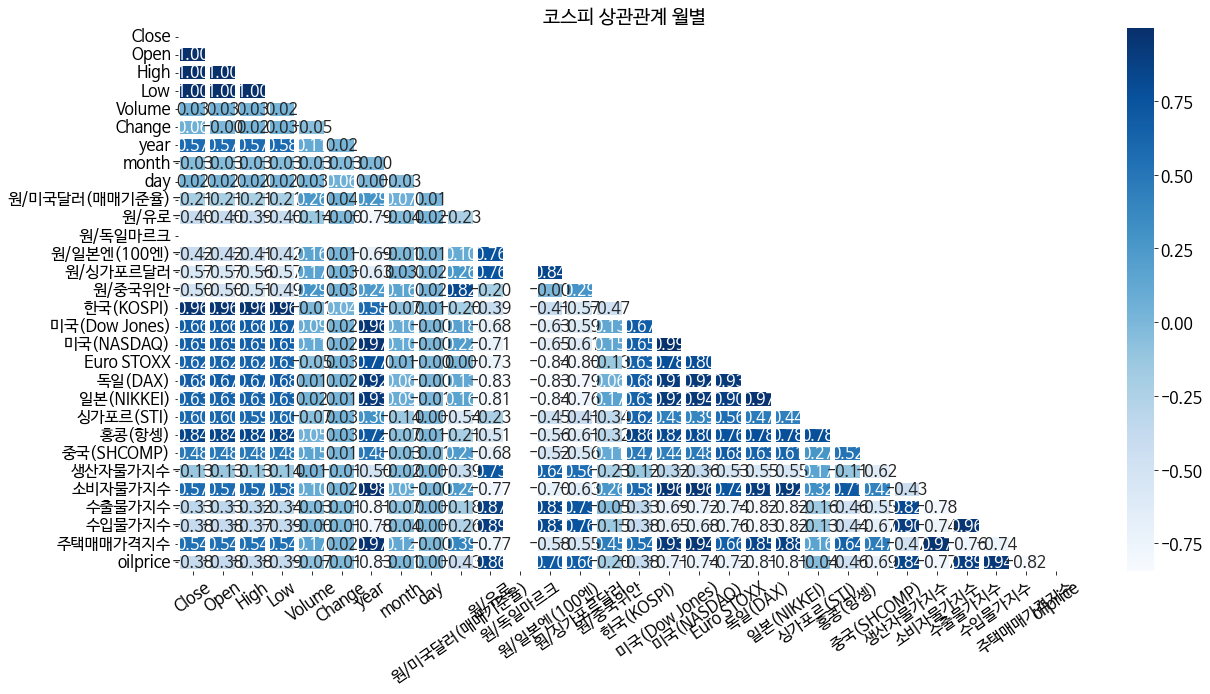

In [ ]:
df34_heat = df3_4.corr()
mask = np.zeros_like(df33_heat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df33_heat, mask = mask, annot=True, linewidths=4, fmt='.2f', cmap='Blues')
plt.xticks(rotation=35)
plt.title('코스피 상관관계 월별')
plt.show()

close와 기준

세계통화: 약한 음의 상관관계 보임
세계주가: 양의 상관관계 보임
소비자물가지지수, 주택매매가격지수와 양의 상관관계 보임. 


### 다중회귀분석

In [ ]:
import statsmodels.api as sm

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 250 entries, (2000, 1) to (2022, 8)
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Close          250 non-null    float64
 1   Open           250 non-null    float64
 2   High           250 non-null    float64
 3   Low            250 non-null    float64
 4   Volume         250 non-null    float64
 5   Change         250 non-null    float64
 6   day            250 non-null    float64
 7   원/미국달러(매매기준율)  250 non-null    float64
 8   원/유로           250 non-null    float64
 9   원/독일마르크        22 non-null     float64
 10  원/일본엔(100엔)    250 non-null    float64
 11  원/싱가포르달러       250 non-null    float64
 12  원/중국위안         176 non-null    float64
 13  한국(KOSPI)      250 non-null    float64
 14  미국(Dow Jones)  250 non-null    float64
 15  미국(NASDAQ)     250 non-null    float64
 16  Euro STOXX     250 non-null    float64
 17  독일(DAX)        250 non-null    float64
 

In [ ]:
df_reg_1 = df3_1
df_reg_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1966 entries, 0 to 1965
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1966 non-null   datetime64[ns]
 1   Close          1966 non-null   float64       
 2   Open           1966 non-null   float64       
 3   High           1966 non-null   float64       
 4   Low            1966 non-null   float64       
 5   Volume         1966 non-null   float64       
 6   Change         1966 non-null   float64       
 7   year           1966 non-null   int64         
 8   month          1966 non-null   int64         
 9   day            1966 non-null   int64         
 10  date           1966 non-null   datetime64[ns]
 11  원/미국달러(매매기준율)  1966 non-null   float64       
 12  원/유로           1966 non-null   float64       
 13  원/독일마르크        485 non-null    float64       
 14  원/일본엔(100엔)    1966 non-null   float64       
 15  원/싱가포르달러       1966 n

In [ ]:
col=['원/미국달러(매매기준율)', '원/유로', '원/일본엔(100엔)', '원/싱가포르달러', '원/중국위안',
      '미국(Dow Jones)', '미국(NASDAQ)', 'Euro STOXX', '독일(DAX)', '일본(NIKKEI)', '싱가포르(STI)', '홍콩(항셍)',
     '중국(SHCOMP)','생산자물가지수','소비자물가지수','수출물가지수','수입물가지수','주택매매가격지수','oilprice']
## 결측값 있는 열은 그냥 빼고 진행함.
X = df_reg_1[col]
y = df_reg_1['Close']

model  = sm.OLS(y,X)
res =model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          1.989e+04
Date:                Sun, 05 Feb 2023   Prob (F-statistic):                        0.00
Time:                        04:27:39   Log-Likelihood:                         -11242.
No. Observations:                1966   AIC:                                  2.252e+04
Df Residuals:                    1947   BIC:                                  2.263e+04
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
원/미국달러(매매기준율)    -2.6674      0.525     -5.085      0.000      -3.696      -1.639
원/유로             -0.0682      0.059     -1.152      0.250      -0.184       0.048
원/일본엔(100엔)      -0.1222      0.088     -1.381      0.168      -0.296       0.051
원/싱가포르달러         -2.6598      0.271     -9.827      0.000      -3.191      -2.129
원/중국위안           34.5055      4.232      8.154      0.000      26.207      42.804
미국(Dow Jones)    -0.0379      0.007     -5.098      0.000      -0.052      -0.023
미국(NASDAQ)        0.0028      0.011      0.246      0.806      -0.020       0.025
Euro STOXX       -0.4226      0.023    -18.287      0.000      -0.468      -0.377
독일(DAX)           0.2312      0.019     12.498      0.000       0.195       0.268
일본(NIKKEI)        0.0187      0.002      7.799      0.000       0.014       0.023
싱가포르(STI)         0.1409      0.023      6.184      0.000       0.096       0.186
홍콩(항셍)            0.0309      0.003     11.045      0.000       0.025       0.036
중국(SHCOMP)       -0.0629      0.007     -9.143      0.000      -0.076      -0.049
생산자물가지수          34.7057      5.091      6.817      0.000      24.721      44.691
소비자물가지수         -14.4360      6.237     -2.315      0.021     -26.667      -2.205
수출물가지수           -3.8090      1.146     -3.323      0.001      -6.057      -1.561
수입물가지수          -11.0105      1.288     -8.548      0.000     -13.537      -8.484
주택매매가격지수          2.9806      2.232      1.336      0.182      -1.396       7.357
oilprice          0.2585      0.054      4.817      0.000       0.153       0.364
==============================================================================
Omnibus:                       18.209   Durbin-Watson:                   0.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.128
Skew:                           0.204   Prob(JB):                     7.02e-05
Kurtosis:                       3.258   Cond. No.                     1.17e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.17e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 다중공산성확인

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model.exog, i)} 
             for i, column in enumerate(model.exog_names)
             if column != 'Intercept')  # 절편의 VIF는 구하지 않는다.

,컬럼,VIF
0,원/미국달러(매매기준율),124507.917380
1,원/유로,1948.009759
2,원/일본엔(100엔),2667.760539
3,원/싱가포르달러,11474.094714
4,원/중국위안,121084.663828
5,미국(Dow Jones),2247.665950
6,미국(NASDAQ),261.352810
7,Euro STOXX,2615.011118
8,독일(DAX),3698.189508
9,일본(NIKKEI),383.041214


모든 변수 vif너무 큼. 다중공산성 높음... 근데 또 회귀는 유의함

### 변수선택_실패

In [ ]:
df_reg_1.info()

In [ ]:
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = df_reg_1[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = df[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit.pvalues()
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

ValueError: ignored

# 세연_반도체 데이터

In [ ]:
df3

In [ ]:
a = pd.read_csv('/content/drive/MyDrive/2023금융분석/data/kospi_export_merge.csv')

In [ ]:
a = a.drop(['Close','Open','High','Low','Volume','Change','month'], axis = 1, inplace=False)
a

,country,date,exp_amount,imp_amount,exp_share,imp_share
0,중국,202101,3613508,554172,56.149712,0.154644
1,중국,202102,4151985,69799,46.422155,0.029035
2,중국,202103,10681937,23634,48.996814,0.008599
3,중국,202104,8302302,118047,71.021343,0.075660
4,중국,202105,4406462,2913,52.446237,0.002131
5,중국,202106,19874403,21091,74.323943,0.021978
6,중국,202107,13951697,60749,81.694209,0.061502
7,중국,202108,6018523,89911,56.910449,0.086987
8,중국,202109,13393948,1612,50.453193,0.001680
9,중국,202110,19632882,987975,59.421887,0.993958


In [ ]:
a['date']=a['date'].apply(lambda x: pd.to_datetime(str(x),format='%Y %m'))
a['year'] = a['date'].dt.year
a['month'] = a['date'].dt.month
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   country     12 non-null     object        
 1   date        12 non-null     datetime64[ns]
 2   exp_amount  12 non-null     int64         
 3   imp_amount  12 non-null     int64         
 4   exp_share   12 non-null     float64       
 5   imp_share   12 non-null     float64       
 6   year        12 non-null     int64         
 7   month       12 non-null     int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 896.0+ bytes


In [ ]:
df_a = pd.merge(df3, a, on=["year", "month"])
df_a

,Date,Close,Open,High,Low,Volume,Change,year,month,day,...,수입물가지수,주택매매가격지수,시점,oilprice,country,date_y,exp_amount,imp_amount,exp_share,imp_share
0,2021-01-04,2944.45,2874.50,2946.54,2869.11,1.030000e+09,0.0247,2021,1,4,...,101.64,87.767,2021-01-01,1441.84,중국,2021-01-01,3613508,554172,56.149712,0.154644
1,2021-01-04,2944.45,2874.50,2946.54,2869.11,1.030000e+09,0.0247,2021,1,4,...,101.64,87.767,2021-01-01,1712.32,중국,2021-01-01,3613508,554172,56.149712,0.154644
2,2021-01-05,2990.57,2943.67,2990.57,2921.84,1.520000e+09,0.0157,2021,1,5,...,101.64,87.767,2021-01-01,1441.84,중국,2021-01-01,3613508,554172,56.149712,0.154644
3,2021-01-05,2990.57,2943.67,2990.57,2921.84,1.520000e+09,0.0157,2021,1,5,...,101.64,87.767,2021-01-01,1712.32,중국,2021-01-01,3613508,554172,56.149712,0.154644
4,2021-01-06,2968.21,2993.34,3027.16,2961.37,1.790000e+09,-0.0075,2021,1,6,...,101.64,87.767,2021-01-01,1441.84,중국,2021-01-01,3613508,554172,56.149712,0.154644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2021-12-24,3012.43,3009.48,3025.77,3009.48,5.375500e+08,0.0048,2021,12,24,...,127.04,99.720,2021-12-01,1646.37,미국,2021-12-01,25864827,51495837,60.961785,27.146007
245,2021-12-27,2999.55,3013.94,3017.31,2999.30,4.753600e+08,-0.0043,2021,12,27,...,127.04,99.720,2021-12-01,1646.37,미국,2021-12-01,25864827,51495837,60.961785,27.146007
246,2021-12-28,3020.24,3006.77,3020.29,2991.55,6.070500e+08,0.0069,2021,12,28,...,127.04,99.720,2021-12-01,1646.37,미국,2021-12-01,25864827,51495837,60.961785,27.146007
247,2021-12-29,2993.29,3002.90,3007.72,2988.67,5.458300e+08,-0.0089,2021,12,29,...,127.04,99.720,2021-12-01,1646.37,미국,2021-12-01,25864827,51495837,60.961785,27.146007


In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

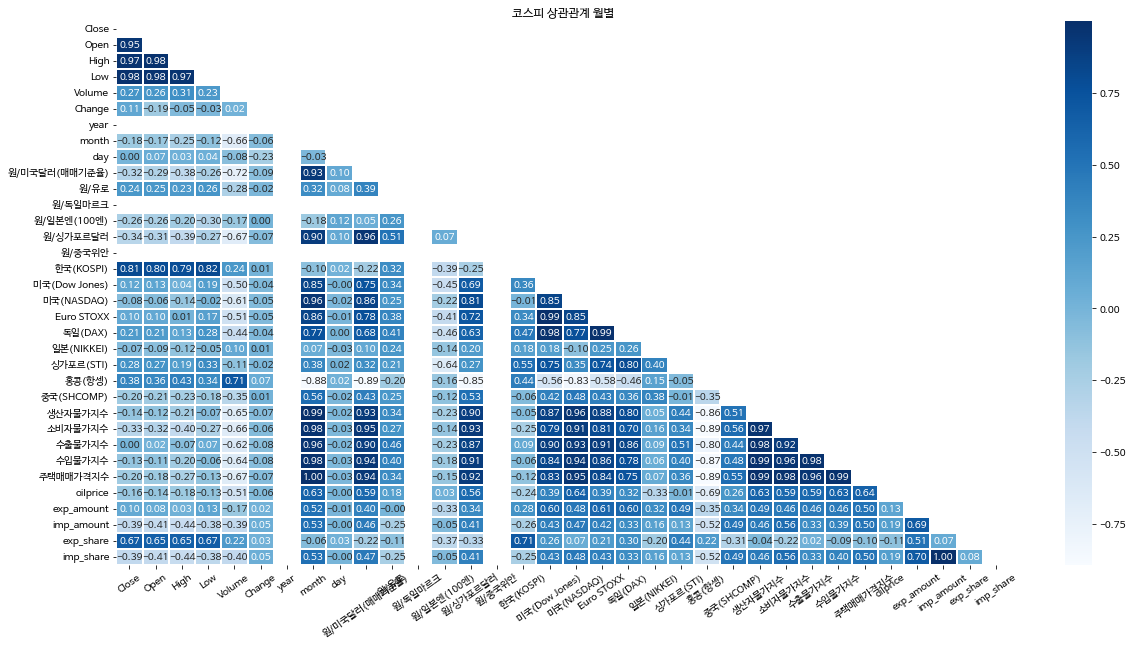

In [ ]:
df_a_heat = df_a.corr()
mask = np.zeros_like(df_a_heat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_a_heat, mask = mask, annot=True, linewidths=1, fmt='.2f', cmap='Blues')
plt.xticks(rotation=35)
plt.title('코스피 상관관계 월별')
plt.show()